Importing Modules


In [76]:
from collections import Counter
import string

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets
    Importing the train and test datasets

    The train dataset is the one which the model is trained, on this we can train
    different machine learning algorithms in hopes of finding the best fit for the 
    problem to be solved.

    The testing data is the dataset on which the model that has been trained 
    on the training dataset is accurate enough to solve the problem at hand.

In [2]:
train = pd.read_csv('../Titanic Project/titanic/train.csv')
test = pd.read_csv('../Titanic Project/titanic/test.csv')

In [3]:
titanic = pd.concat([train, test])

****Taking at look at the dataset.****
<br>
Checking the first and last 5 rows of the dataset.

In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Checking the dataset helps to confirm that all the columns are the right datatypes.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for missing values


In [8]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Here, it is to be noted that the survived, age, cabin and embarked columns 
contain missing values.
<br>
These have to be handled before feeding the data into a machine learning model

**Statistical Summary**

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### **EDA**

This involves using visualization and statistical methods to analyze data and bring the important parts of data into focus.

Survival Rate

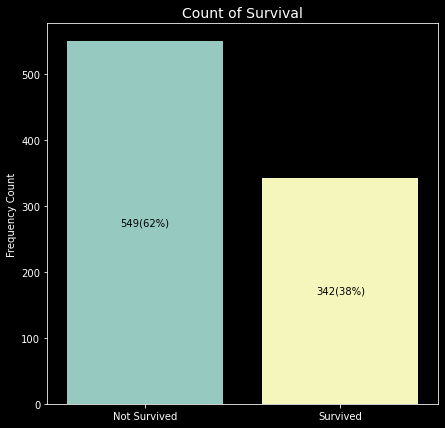

In [12]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.barplot(
    x= train["Survived"].value_counts().index, y=train["Survived"].value_counts(), 
    data=train
)

ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_ylabel("Frequency Count")
ax.set_title("Count of Survival", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' +
        '{:.0%}'.format(bar.get_height() / len(train.Survived)) + ')',
        horizontalalignment='center', verticalalignment='center', color='black'
    )

This plot gives us an overview information that 
<br>
62% of the passengers did not survive, while <br>
38% survived

**Embarked Count**

Text(0.5, 0, 'Cities')

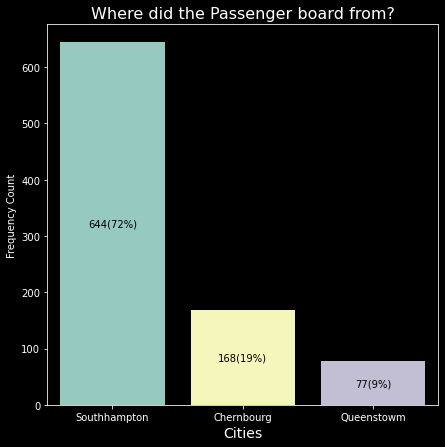

In [13]:
fig, embarked = plt.subplots(figsize=(7, 7))

sns.barplot(
    x=train['Embarked'].value_counts().index,
    y=train['Embarked'].value_counts()
)
embarked.set_xticklabels(['Southhampton', 'Chernbourg', 'Queenstowm'])
embarked.set_ylabel("Frequency Count")
embarked.set_title("Embarked Count")

for bar in embarked.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    embarked.text(
        label_x, label_y, 
        str(int(bar.get_height())) + '(' + '{:.0%}'.format(bar.get_height() / len(train["Embarked"])) + ')', 
        horizontalalignment='center', verticalalignment='center', color='black')

embarked.set_title("Where did the Passenger board from?", fontsize=16)
embarked.set_xlabel("Cities", fontsize=14)
    

Here, it is make evident that a large percentage of the passengers on the ship boarded from Sounthhampton with 72%, Chernbourg(19%), Queenstown(9%)


**Categories Variables Count**

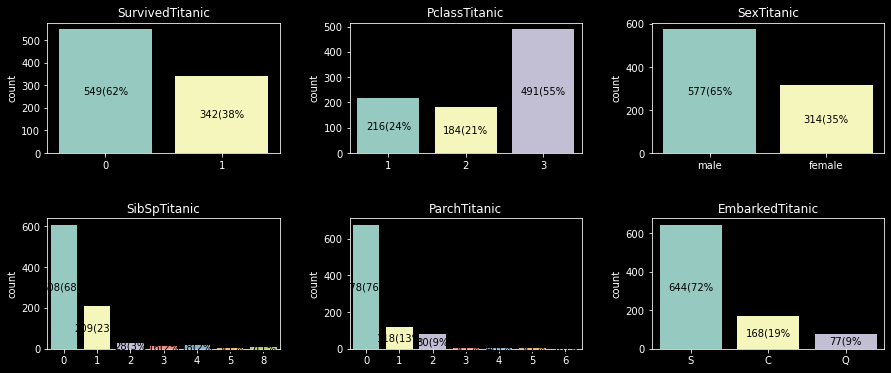

In [14]:
fig, myplot = plt.subplots(figsize=(15, 6), nrows=2, ncols=3)

cat_features = [
    'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', "Embarked"
]

row, col, num_cols = 0, 0, 3

for feature in cat_features:
    sns.barplot(
        x=train[feature].value_counts().index,
        y=train[feature].value_counts(),
        ax=myplot[row, col]
    )
    myplot[row, col].set_title(feature + "Titanic")
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_ylabel("count") 
    col += 1
    if col == 3:
        col = 0
        row += 1

plt.subplots_adjust(hspace=0.5, wspace=0.3)

for v in range(2):
    for z in range(3):
        for bar in myplot[v, z].patches:
            label_x = bar.get_x() + bar.get_width() / 2
            label_y = bar.get_y() + bar.get_height() / 2

            myplot[v, z].text(
                label_x, label_y,
                str(int(bar.get_height())) + '(' + '{:.0%}'.format(
                    bar.get_height() / len(train[feature])
                ),
                horizontalalignment='center', verticalalignment='center',
                color='black', fontsize=10
            )


**Age Distribution**

Since the age distribution is being inspected before the missing values are handled
this sort of plot is **pre-imputation** since we have not accounted for missing values

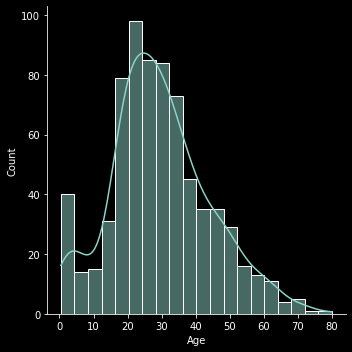

In [15]:
known_ages = train["Age"][train["Age"].notnull()]

sns.displot(known_ages, kde=True, palette="Paired")

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

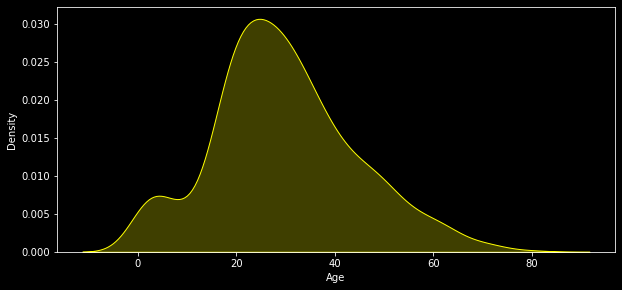

In [16]:
fig, ax = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"], kernel="gau", ax=ax,
color="yellow", shade=True, legend=True)

**Correlation heatmap**

A correlation heatmap helps to understand the realtionships between the data's features
<br>
It can also be used to detect multi-collinearity or even outliers
<br>
**Multicollinearity** - is the occurence of high intercorrelations between two or more independent variables in a mulitple regression model
<br>
**Multiple Regression** - a statistical technique used to analyze the relationship between a single dependent variable and multiple independent variables

The heatmap does not include unfactorized categorical columns, it plots solely numerical columns

(7.0, 0.0)

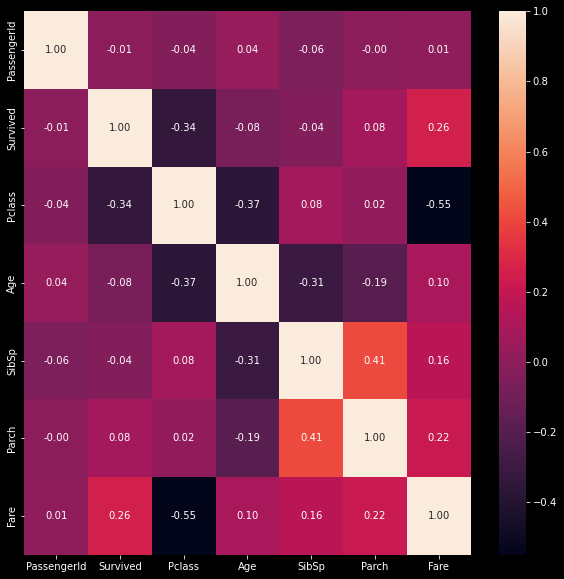

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f', ax=ax)
ax.set_ylim(7, 0)

In [18]:
def print_percentages(df, col_name, col_values):
    for x in col_values:
        group = df.loc[df[col_name] == x]
        print (" {0} Survival rate: {1:.3f}".format(x, group['Survived'].sum() / group.shape[0]))

In [19]:
print_percentages(train, 'Sex', ['male', 'female'])

 male Survival rate: 0.189
 female Survival rate: 0.742


**Gender Against Survival**

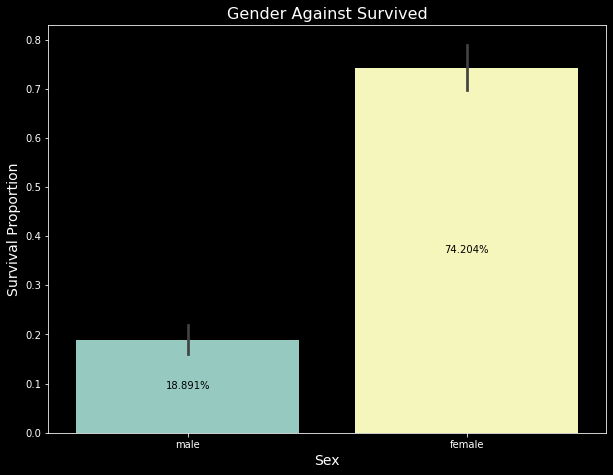

In [20]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.barplot(
    x="Sex",
    y="Survived",
    data=train,
    ax=ax,
    estimator=np.mean,
    linewidth=3
)

ax.set_title("Gender Against Survived", fontsize=16)
ax.set_xlabel("Sex", fontsize=14)
ax.set_ylabel("Survival Proportion", fontsize=14)

for bar in ax.patches:
    label_x = bar.get_x() + bar.get_width() / 2
    label_y = bar.get_y() + bar.get_height() / 2

    ax.text(
        label_x, label_y,
        "{:.3%}".format(bar.get_height()),
        horizontalalignment='center', verticalalignment='center', color='black')
    

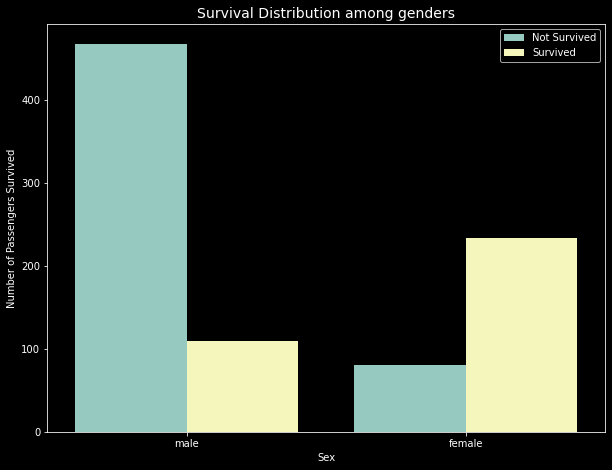

In [21]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="Sex",
    hue="Survived",
    data=train,
)

ax.set_title("Survival Distribution among genders", fontsize=14)
ax.set_xlabel("Sex")
ax.set_ylabel("Number of Passengers Survived")
ax.legend(["Not Survived", "Survived"])

**Passenger Class against survived**

Text(0, 0.5, '% of Passengers Survived')

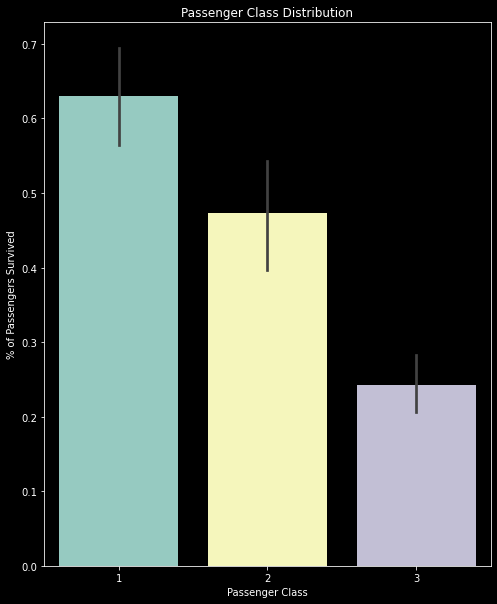

In [22]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Pclass",
    y="Survived",
    data=train,
    estimator=np.mean,
    ax=ax)

ax.set_title("Passenger Class Distribution")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("% of Passengers Survived")

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


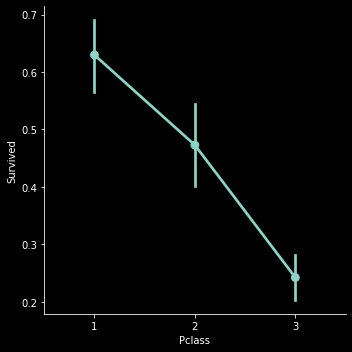

In [23]:
sns.catplot('Pclass', "Survived", kind='point', data=train)

## **Embarked Survived**

In [24]:
print_percentages(train, 'Embarked', ['S', 'C', 'Q'])

 S Survival rate: 0.337
 C Survival rate: 0.554
 Q Survival rate: 0.390


Text(0, 0.5, '% of Passengers Survived')

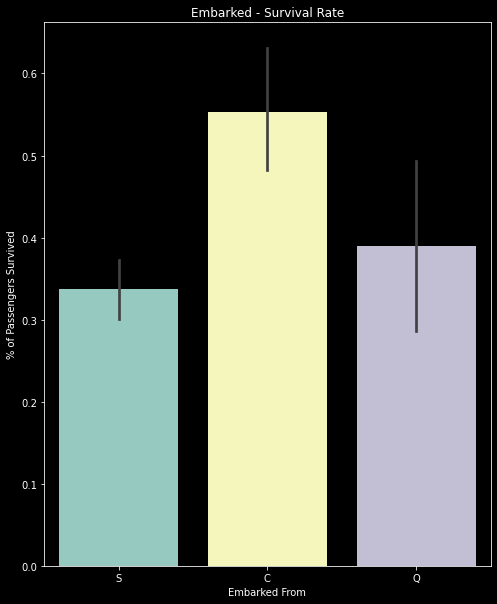

In [25]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Embarked",
    y="Survived",
    estimator = np.mean,
    data=train,
    ax=ax,
    linewidth=2
)
ax.set_title("Embarked - Survival Rate")
ax.set_xlabel("Embarked From")
ax.set_ylabel("% of Passengers Survived")

## **Pclass vs Embarked**

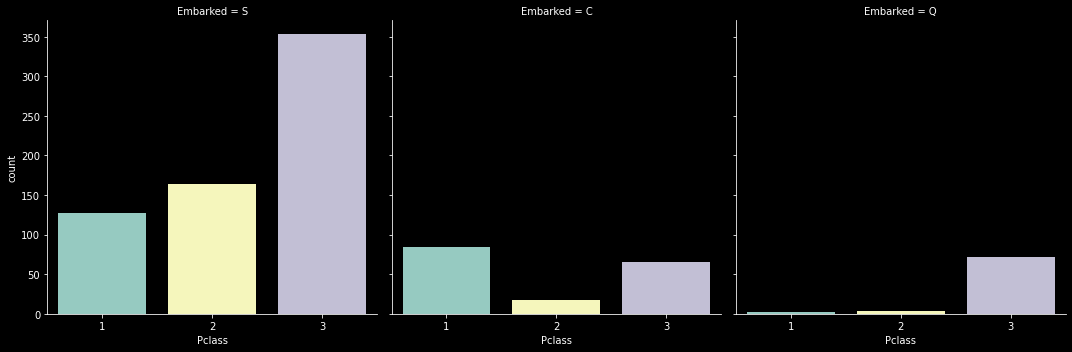

In [26]:
g = sns.catplot(
    x="Pclass", col='Embarked',
    data=train, kind="count"
)

**Gender vs. Embarked**

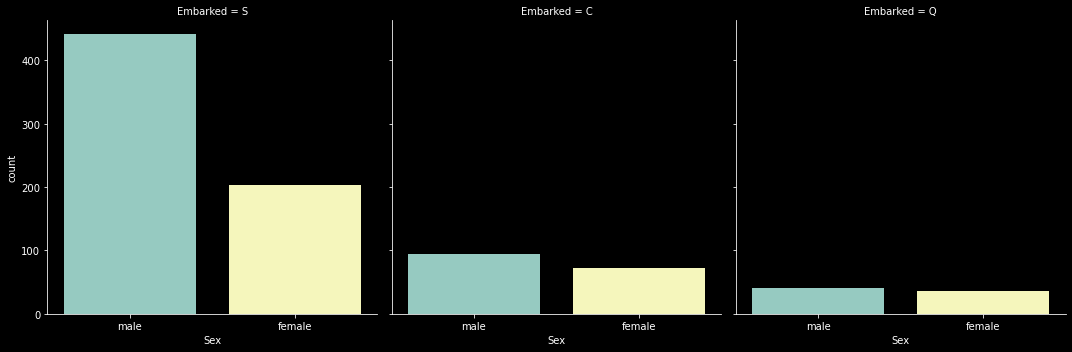

In [27]:
g = sns.catplot(
    x="Sex",
    col="Embarked",
    data=train,
    kind="count"
)

**Age against Survived**

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


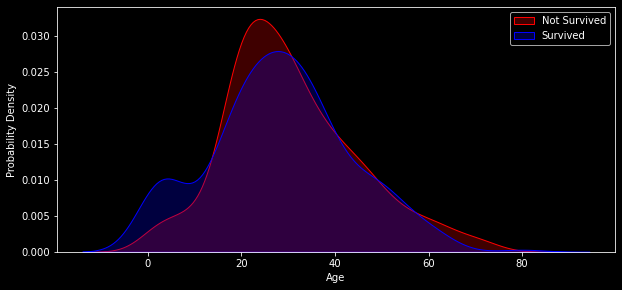

In [28]:
fig, ax = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (train['Age'].notnull())], kernel='gau',
ax=ax, color="red", shade=True, legend=True)

sns.kdeplot(
    data=train["Age"][(train['Survived'] == 1) & (train['Survived'].notnull())],
    kernel='gau',
    ax=ax,
    color="blue",
    shade=True
)

ax.set_xlabel("Age")
ax.set_ylabel("Probability Density")
ax.legend(
    ["Not Survived", "Survived"]
)

**Plot Against survived**

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


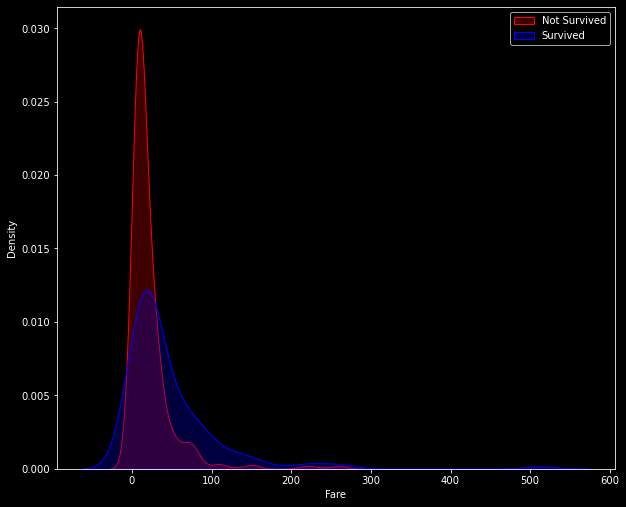

In [29]:
fig, ax = plt.subplots(figsize=(10, 8.5))

sns.kdeplot(
    data=train.loc[(train["Survived"] == 0), "Fare"],
    kernel='gau', ax=ax,
    color="red",
    shade=True
)

sns.kdeplot(
    data=train.loc[(train["Survived"] == 1), "Fare"],
    kernel='gau', ax=ax,
    shade=True,
    color="blue"
)

ax.legend(['Not Survived', 'Survived'])


In [30]:
print_percentages(train, 'Parch', [0, 1, 2, 3, 4, 5, 6])

 0 Survival rate: 0.344
 1 Survival rate: 0.551
 2 Survival rate: 0.500
 3 Survival rate: 0.600
 4 Survival rate: 0.000
 5 Survival rate: 0.200
 6 Survival rate: 0.000


Text(0, 0.5, '% of Passenger Survived')

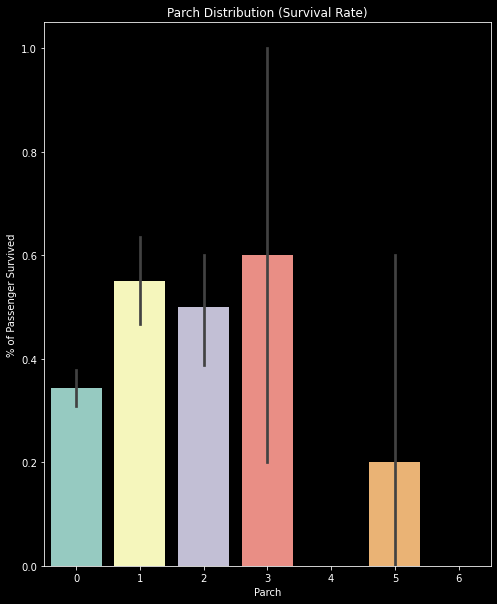

In [31]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
    x="Parch",
    y="Survived",
    estimator=np.mean,
    data=train,
    ax=ax,
    linewidth=2
)

ax.set_title("Parch Distribution (Survival Rate)")
ax.set_xlabel("Parch")
ax.set_ylabel("% of Passenger Survived")


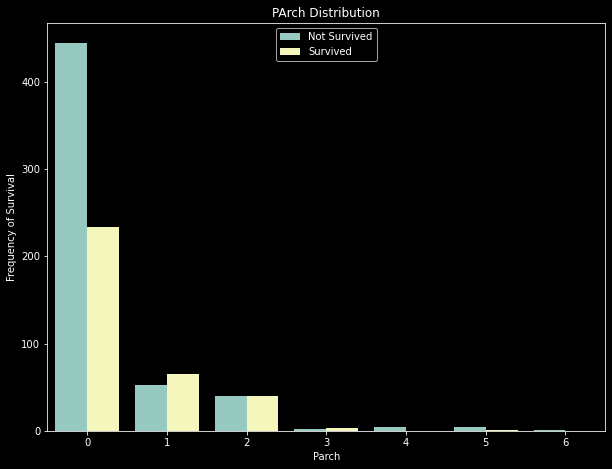

In [32]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="Parch",
    data=train,
    hue="Survived",
    linewidth=2
)

ax.set_title("PArch Distribution")
ax.set_xlabel("Parch")
ax.set_ylabel("Frequency of Survival")
ax.legend(["Not Survived", "Survived"])

In [33]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [34]:
print_percentages(train, 'SibSp', [0, 1, 2, 3, 4, 5, 6])

 0 Survival rate: 0.345
 1 Survival rate: 0.536
 2 Survival rate: 0.464
 3 Survival rate: 0.250
 4 Survival rate: 0.167
 5 Survival rate: 0.000
 6 Survival rate: nan


C:\Users\DAVID-~1\AppData\Local\Temp/ipykernel_15584/4128903775.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  print (" {0} Survival rate: {1:.3f}".format(x, group['Survived'].sum() / group.shape[0]))


Text(0, 0.5, 'Survival Percentage')

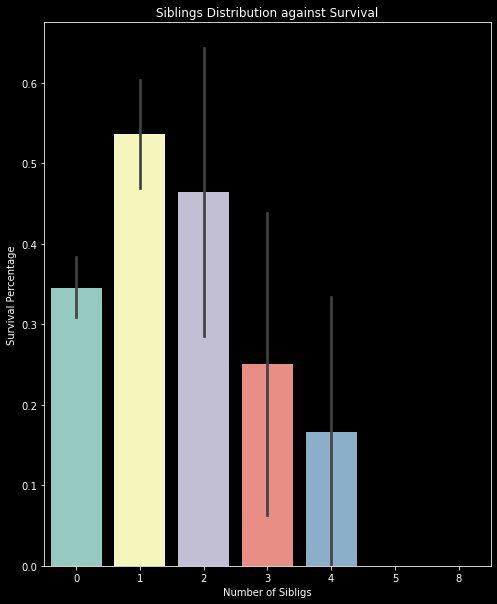

In [35]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.barplot(
    x="SibSp",
    y="Survived",
    estimator=np.mean,
    data=train,
    ax=ax
)

ax.set_title("Siblings Distribution against Survival")
ax.set_xlabel("Number of Sibligs")
ax.set_ylabel("Survival Percentage")

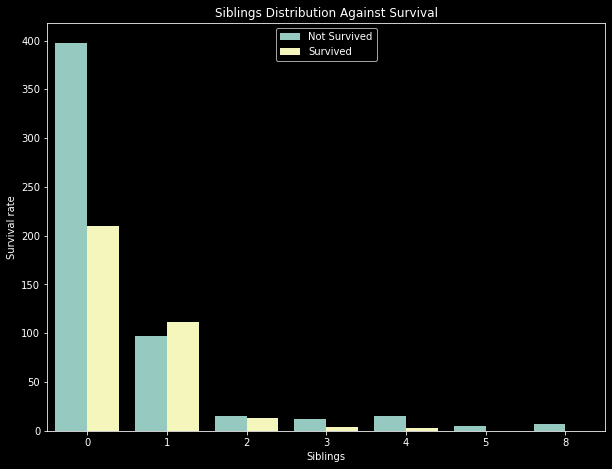

In [36]:
fig, ax = plt.subplots(figsize=(10, 7.5))

sns.countplot(
    x="SibSp",
    hue="Survived",
    data=train, 
    linewidth=2
)

ax.set_title("Siblings Distribution Against Survival")
ax.set_xlabel("Siblings")
ax.set_ylabel("Survival rate")
ax.legend(["Not Survived", "Survived"])

### Feature Engineering

**Missing Values**

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Fare**

Here we check the median of the values in the parch and Pclass features and then select the median value coressponding to a passenger with Pclass 3 and 0 dependents

In [39]:
median_fare = test.groupby(['Pclass', 'Parch']).Fare.median()[3][0]

median_fare

7.8542

In [40]:
test['Fare'] = test['Fare'].fillna(median_fare)

Checking the Test set against the training set

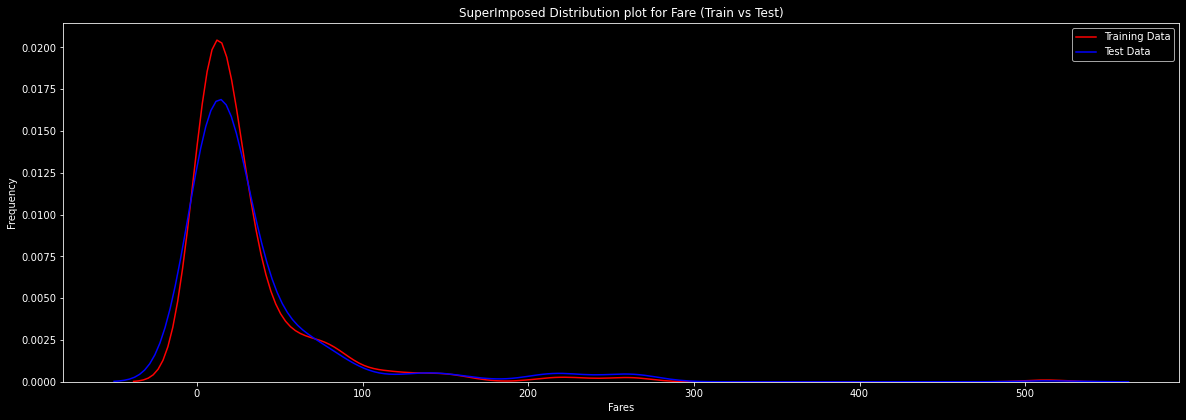

In [41]:
fig, ax = plt.subplots(figsize=(20, 6.6))

sns.kdeplot(train.Fare, color="red", label="Training Data", ax=ax)
sns.kdeplot(test.Fare, label="Test Data", color='blue', ax=ax)

ax.set_title("SuperImposed Distribution plot for Fare (Train vs Test)")
ax.set_ylabel("Frequency")
ax.set_xlabel("Fares")
ax.legend()

**Embarked**

In [42]:
test.Embarked.isnull().sum()

0

In [43]:
train.Embarked.isnull().sum()

2

In [44]:
# Checking the rows with missing values
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Borrowing from the EDA performed on Embarked earlier, it is safe to assume the passengers who bought Pclass 1 tickets are from the "richest" town which is Southhampton

In [45]:
train["Embarked"] = train["Embarked"].fillna('S')

**Age**

In [46]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [47]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We have a lot of missing values in both the test and training set

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


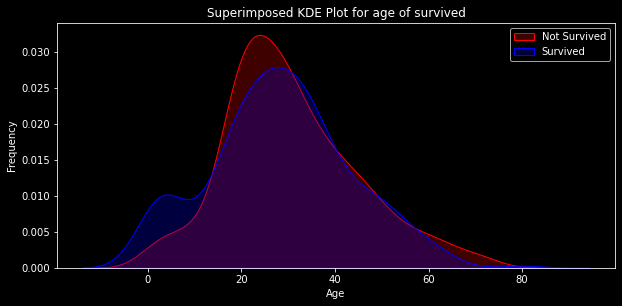

In [48]:
# Exploring the age distribution in train set
fig, ax = plt.subplots(figsize=(10, 4.5))

preimputation=sns.kdeplot(
    data=train["Age"][(train['Survived'] == 0) & (train['Age'].notnull())],
    kernel='gau',
    label="Not Survived",
    ax=ax,
    color='red',
    shade=True,
    legend=True
)

preimputation = sns.kdeplot(
    data=train["Age"][(train['Survived'] == 1) & (train['Age'].notnull())],
    kernel='gau',
    label="Survived",
    ax=ax,
    color='Blue',
    shade=True,
    legend=True
)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Superimposed KDE Plot for age of survived")
ax.legend()

In [49]:
# Creating a copy of the training set to test out the options
copy2 = train.copy()
missing_age_rows = copy2.Age.isna()

In [50]:
missing_age_rows

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [51]:
age_median_pclass_sibsp = copy2.groupby(['Pclass', 'SibSp'])['Age'].median()
age_median_pclass_sibsp


Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

Passengers with Pclass 3 and sibsp 8 all have missing values so we impute it with the values from pclass 3 sibsp 5 since its the closest to it in the dataset


In [52]:
age_median_pclass_sibsp[3][8] = age_median_pclass_sibsp[3][5]

In [53]:
age_median_pclass_sibsp

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8        11.0
Name: Age, dtype: float64

In [54]:
# imputting the values
copy2.Age = copy2.groupby(['Pclass', 'SibSp'])["Age"].apply(lambda x: x.fillna(x.median()))

In [55]:
copy2.Age = copy2.Age.fillna(11)

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


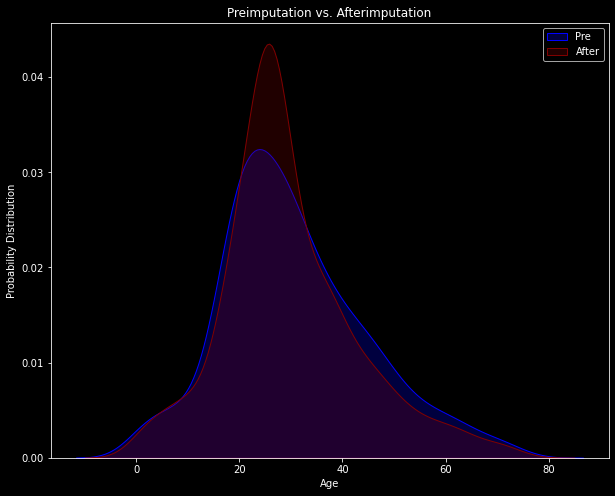

In [56]:
# Compare the distributions
fig, ax = plt.subplots(figsize=(10, 8))

preimputation=sns.kdeplot(
    data=train['Age'][(train["Survived"] == 0) & (train["Age"].notnull())],
    kernel='gau', ax=ax, color="Blue", shade=True,
    legend=True, label="Pre"
)

afterimputation = sns.kdeplot(
    data=copy2["Age"][(copy2["Survived"] == 0) & (copy2["Age"].notnull())],
    kernel='gau', legend=True,
    ax=ax, color='maroon', shade=True,
    label="After"
)

ax.set_title("Preimputation vs. Afterimputation")
ax.set_xlabel("Age")
ax.set_ylabel("Probability Distribution")
ax.legend()

C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\David-Daniel\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


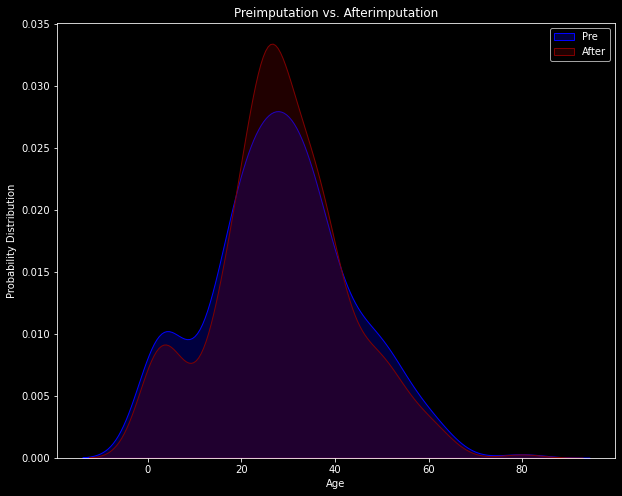

In [57]:
# Compare the distributions
fig, ax = plt.subplots(figsize=(10, 8))

preimputation = sns.kdeplot(
    data=train['Age'][(train["Survived"] == 1) & (train["Age"].notnull())],
    kernel='gau', ax=ax, color="Blue", shade=True,
    legend=True, label="Pre"
)

afterimputation = sns.kdeplot(
    data=copy2["Age"][(copy2["Survived"] == 1) & (copy2["Age"].notnull())],
    kernel='gau', legend=True,
    ax=ax, color='maroon', shade=True,
    label="After"
)

ax.set_title("Preimputation vs. Afterimputation")
ax.set_xlabel("Age")
ax.set_ylabel("Probability Distribution")
ax.legend()


In [58]:
copy5 = train.copy()
copy5["Age"].fillna(copy5['Age'].median(), inplace=True)

In [59]:
train = copy2

**Test Set**

In [60]:
test_age_pclass_sibsp = test.groupby(['Pclass', 'SibSp']).median()['Age']
test.Age = test.groupby(["Pclass", "SibSp"])["Age"].apply(lambda x: x.fillna(x.median()))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


****Outlier****

In [61]:
def outliers(df, n, cols):
    """
        A function to detect outliers in a dataset using
        Tukey's Fences
        ( (Q1 - k(Q3 - Q1)), (Q1 + k(Q3 - Q1)) ),
        where Q1 -> lower quartile
              Q2 -> upper quartile
    """
    out_indices = []
    for col in cols:

        #lower quartile
        q1 = np.nanpercentile(df[col], 25)

        # Upper Quartile
        q3 = np.nanpercentile(df[col], 75)

        #Interquartile range
        iqr = q3 - q1

        #outlier step
        outlier_step = 1.5 * iqr

        # Determine the indices of the outliers
        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index

        print(col, q1-outlier_step, q3+outlier_step)

        out_indices.extend(outlier_list_col)
    
    out_indices = Counter(out_indices)
    multiple_outliers = list(k for k, v in out_indices.items() if v > n)

    return multiple_outliers


    


In [62]:
to_drop = outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])
to_drop


Age -0.5 59.5
SibSp -1.5 2.5
Parch 0.0 0.0
Fare -26.724 65.6344


[438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [63]:
train.loc[to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,11.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,11.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,11.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,11.0,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S


**Finding Columns Individually**

In [64]:
def individual_outlier(col):
    """A function to find outlier in a specified column from a dataset"""
    
    # sorting column since quartile ranges need to be in order
    sorted(col)
    q1, q3 = np.nanpercentile(col, [25, 75])
    iqr = q3 - q1

    # getting the lower and upper range as defined by tuckey's fences
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)

    return lower_range, upper_range




In [68]:
# Using just the numerical columns and excluding the categorical columns
cols = ['Age', 'Fare', 'Parch', 'SibSp']

for col in cols:
    print(f'Upper and Lower bound for {col}: ',
          individual_outlier(train[col]), sep="\n")


Upper and Lower bound for Age: 
(-0.5, 59.5)
Upper and Lower bound for Fare: 
(-26.724, 65.6344)
Upper and Lower bound for Parch: 
(0.0, 0.0)
Upper and Lower bound for SibSp: 
(-1.5, 2.5)


**Features to add or drop**

Examples of features to be dropped include:
 * Features with high collinearity
 * features that are of no significance to the model
 * Features with too many categories eg Name, although it is important to note       that useful features could be engineered from these features
       

In [69]:
for col in train.columns:
    print(f"Number of Unique values for {col} is ", train[col].nunique())

Number of Unique values for PassengerId is  891
Number of Unique values for Survived is  2
Number of Unique values for Pclass is  3
Number of Unique values for Name is  891
Number of Unique values for Sex is  2
Number of Unique values for Age is  89
Number of Unique values for SibSp is  7
Number of Unique values for Parch is  7
Number of Unique values for Ticket is  681
Number of Unique values for Fare is  248
Number of Unique values for Cabin is  147
Number of Unique values for Embarked is  3


**Dropping Ticket and PassengerID**

We drop these as they seem to be entirely randomized, although it is important to note that this is just an hypothesis as there might be an underlying pattern

In [70]:
# Dropping PassengerId feature from test and training sets
train.drop(['PassengerId'], inplace=True, axis=1)
test.drop(['PassengerId'], inplace=True, axis=1)

In [71]:
train.drop(['Ticket'], inplace=True, axis=1)
test.drop(['Ticket'], inplace=True, axis=1)

We try to engineer some features from the name column. <br>
The argument is that the titles attached to the names might in some way indicate that people of a particular social class had a higher rate of survival than other socail classes.

In [72]:
train["Name"].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [88]:
def seperate_name(data):
    """A function to seperate the names in a column to
        first names, surnames, and titles."""

    families = []
    titles = []
    new_name = []

    #Checking each row in the dataset
    for i in range(len(data)):
        name = data.iloc[i]

        # Extract the names in brackets
        if '(' in name:
            name_ex_bracket = name.split('(')[0]
        else:
            name_ex_bracket = name
        
        family = name_ex_bracket.split(",")[0]
        title = name_ex_bracket.split(",")[1].strip().split(" ")[0]

        for c in string.punctuation:
            name = name.replace(c, "").strip()
            family = family.replace(c, "").strip()
            title = title.replace(c, "").strip()\

        families.append(family)
        titles.append(title)
        new_name.append(name)

    return families, titles, new_name

In [89]:
seperate_name(train.Name)

(['Braund',
  'Cumings',
  'Heikkinen',
  'Futrelle',
  'Allen',
  'Moran',
  'McCarthy',
  'Palsson',
  'Johnson',
  'Nasser',
  'Sandstrom',
  'Bonnell',
  'Saundercock',
  'Andersson',
  'Vestrom',
  'Hewlett',
  'Rice',
  'Williams',
  'Vander Planke',
  'Masselmani',
  'Fynney',
  'Beesley',
  'McGowan',
  'Sloper',
  'Palsson',
  'Asplund',
  'Emir',
  'Fortune',
  'ODwyer',
  'Todoroff',
  'Uruchurtu',
  'Spencer',
  'Glynn',
  'Wheadon',
  'Meyer',
  'Holverson',
  'Mamee',
  'Cann',
  'Vander Planke',
  'NicolaYarred',
  'Ahlin',
  'Turpin',
  'Kraeff',
  'Laroche',
  'Devaney',
  'Rogers',
  'Lennon',
  'ODriscoll',
  'Samaan',
  'ArnoldFranchi',
  'Panula',
  'Nosworthy',
  'Harper',
  'Faunthorpe',
  'Ostby',
  'Woolner',
  'Rugg',
  'Novel',
  'West',
  'Goodwin',
  'Sirayanian',
  'Icard',
  'Harris',
  'Skoog',
  'Stewart',
  'Moubarek',
  'Nye',
  'Crease',
  'Andersson',
  'Kink',
  'Jenkin',
  'Goodwin',
  'Hood',
  'Chronopoulos',
  'Bing',
  'Moen',
  'Staneff',
  '

**Adding them as features in the dataset**

In [93]:
train["Surname"], train["Title"], train["Newname"] = seperate_name(train.Name)
test["Surname"], test["Title"], test["Newname"] = seperate_name(test.Name)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


In [94]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

**Generalizing the titles**

In [95]:
train['Title'] = train['Title'].replace(['Ms', 'Mlle'], 'Miss')
train['Title'] = train['Title'].replace(['Mme'], 'Mrs')
train['Title'] = train['Title'].replace(["Dr", 'Rev', 'the', 'Jonkheer', 'Lady', 'Sir', 'Don'], "Noble")
train['Title'] = train['Title'].replace(["Major", "Col", "Capt"], "Navy")

train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Noble      18
Navy        5
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Survived'>

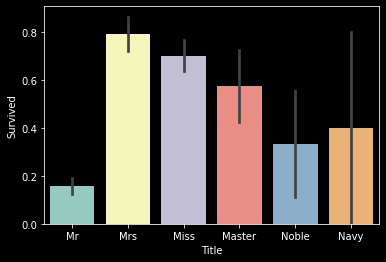

In [96]:
sns.barplot(x='Title', y="Survived", data = train)

Seems there are more males in the noble class for it to have such a low survival rate. <br>
This would support what we learnt from earlier analysis concerning the survival rate of males in general

In [98]:
nobles_survived = train[train["Title"] == "Noble"].groupby(['Sex'])["Survived"].value_counts()
nobles_survived

Sex     Survived
female  1            3
male    0           12
        1            3
Name: Survived, dtype: int64

All female nobles (Just three of them) survived, while of the 15 male nobles just 12 survived


**Repeating for test data**

In [99]:
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [100]:
test['Title'] = test['Title'].replace(["Ms", 'Dona'], 'Miss')
test['Title'] = test['Title'].replace(["Dr", 'Rev'], "Noble")
test['Title'] = test['Title'].replace(['Col'], 'Navy')

In [101]:
test['Title'].value_counts()

Mr        240
Miss       80
Mrs        72
Master     21
Noble       3
Navy        2
Name: Title, dtype: int64

#### **Cabin**

In [102]:
train["Cabin"].isnull().sum()

687

In [103]:
test["Cabin"].isnull().sum()

327

Too many missing values

In [108]:
train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

categorising the cabin types

In [105]:
def cabin_sep(data):
    """Function to seperate the cabins into their various types"""
    cabin_type = []

    for i in range(len(data)):

        if data.isnull()[i] == True:
            cabin_type.append("M")
        else:
            cabin = data[i]
            cabin_type.append(cabin[:1])

    return cabin_type

In [107]:

train['Cabin'] = train['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])
train.Cabin


0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [111]:
train.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [112]:
idx = train[train.Cabin == 'T'].index
train.loc[idx, 'Cabin'] = 'A'
train.Cabin.value_counts()



M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Cabin, dtype: int64

In [113]:
test["Cabin"] = test["Cabin"].fillna("M").astype(str).apply(lambda cabin: cabin[0])
test.Cabin.value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64